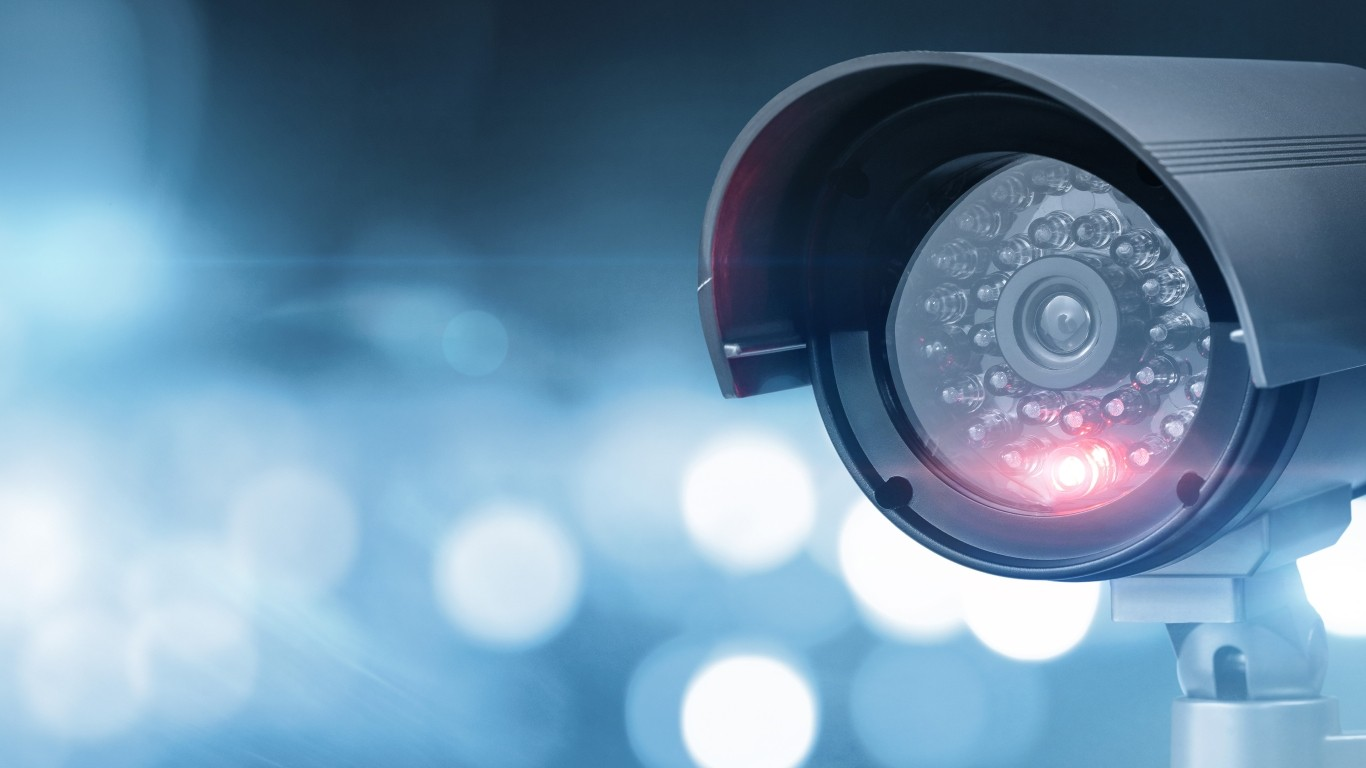

# Firearm Image Classification

`Author: Anita Camlic`
***

# Overview

According to Forbes' magazine, in the United States there have been 611 mass shootings so far this year (2022). As of Nov. 25 2022,  **39,935**  people have died from gun-related events in the U.S. this year, including **18,221** who died by homicide, murder or an unintentional shooting, plus another 21,714 who died by suicide.

Of those victims, **291 were children ages 0-11, and 1,225 were teens ages 12-17**. Gun violence is an epidemic. 

There is currently no systemic solution to gun violence in the United States. Though there has not been systemic changes to gun violence in the United States, there have been technological advancements that can be applied to this problem. One of those improvements being Convolutional Neural Networks. Convolutional Neural Networks can be used to identify patterns in images. For example, Convolutional Neural Networks can be used to differentiate between a cat and a dog in an image. They are used in applications like facial recognition for the Iphone and image tagging on facebook. Technology like this can also be used on videos, for applications like self driving cars and object detection. 

For my project, I will be using Convolutional Neural Networks to classify images as either holding a gun or holding a common handheld object. My project is a binary classification model. Since a lot of handheld devices (phone, wallet, credit card) can be mistaken for a gun (and vice versa), I plan to train a model to be able to make that distinction. This type of modeling could eventually be applied to surveillance cameras on public areas like schools, grocery stores, movie theaters and more. Hopefully this problem can be broadened upon in the future to reduce the amount of gun-related deaths and injuries in the United States.


***

# Business Problem

Schools need assurance that their students will be kept safe while at school. Children should not have to worry about being a victim of gun violence while they are at school. School should not be a place of fear. It should be a place of nurturing, learning and growing. To combat this fear that many have, I have created an image classification model that will differentiate common handheld objects and guns. This will make it easier for a school to recognize a threat and react accordingly. This presentation is directed at the city of Buffalo's Department of Safety. 

This model could trigger some sort of alarm or at least a call to the police. This can be used as a first line of defense against mass shooters. However, this should not be the only sort of defense. This is simply a tool that can quickly and  efficiently classify a gun vs other handheld objects. The main point of this system is to save time, and to get help to the area sooner in hopes to mitigate any potential damage.

Note: Though this model is directed towards Buffalo's Department of Safety for implementation in schools, it is not limited to schools. I would like to see it implemented in all public spaces like grocery stores, government buildings, banks, shopping malls, places of worship, and many more.

***

# Data Understanding 

The data I used for this project is from the University of Granada's Andalusian Research Institute in Data Science and Computational Intelligence. The data is open data and able to be downloaded at the link below. 

The dataset I used specifically for this project was dataset 2.3 Weapons and similar handled object detection. [Dataset found here](https://github.com/ari-dasci/OD-WeaponDetection/tree/master/Weapons%20and%20similar%20handled%20objects) This dataset contains over 5,000 images of various weapons (knives, guns) and common handheld objects (wallet, credit card, cellphone, dollar bills). 


I did not include the data in the github because it was too large to fit. Below is the link to all of the datasets from the weapon detection project at the University of Granada's Andalusian Research Institute in Data Science and Computational Intelligence.

[All Weapon Detection Data](https://dasci.es/transferencia/open-data/24705/)

***

# Data Preparation

For my specific business problem, I wanted to work with guns. So for my data preparation I first downloaded the images from the link in Data Understanding to a folder on my computer. I then removed all of the images of knives and only kept the images containing guns. I also removed images with just a gun on a blank surface. That will not help in a practical application. Being able to detect a gun on a blank surface might be good for an application in TSA, however for surveillance applications and trying to flag for an individual holding a gun, it wouldn't help much and it might confuse my model even more. 
*** 

After I removed certain images, I then created a folder on my desktop for my data to live. I did this because my data was too large to keep on github, so I had to keep it in a folder on my computer. Then I classified them by hand in different folders as either 0 (containing no weapon/gun) or 1 (containing a weapon/gun). After this, I saved the absolute path as a string in my Jupyter Notebook and I used ImageDataGenerator objects to help prepare my images for modeling. 

ImageDataGenerator takes in a path to your data, and transforms it for modeling. You just specify in the arguments if you want the images rescaled or augmented and it will perform those transformations and return an instance ready to be fed right into your Convolutional Neural Network.

<b> Note: </b> You will see many of the models commented out. I commented these models out to save computational time. However if you would like to run them all yourself, you can just uncomment the models and they will work as intended.
***

In [1]:
#imports 
import os, shutil
import pandas as pd
from sklearn.metrics import accuracy_score, recall_score
import time
import matplotlib.pyplot as plt
import scipy
import numpy as np
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras import models
from keras import layers
from tensorflow.keras import regularizers
import seaborn as sns
import tensorflow as tf
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score

In [2]:
# this is a dictionary I created to keep track of my modeling scores
score_dictionary = {}

In [3]:
# strings of directories for the different data
train_images_dir = 'C:/Users/User/Documents/Flatiron/Capstone/train_data_guns'
test_images_dir = 'C:/Users/User/Documents/Flatiron/Capstone/test_data_guns'

In [4]:
# here I set 3 global variables: target size, batch size and epochs
# I do this because these variables are used quite often, so I wanted to be able to change it one place 
# and have it change everywhere in the rest of the notebook.
global_target_size = (127,127) # The size of the images
global_batch_size = 32 # The size of each batch being fed to the models
global_epochs = 35 # How many times each model should run through the entire dataset

In [5]:
train_val_generator = ImageDataGenerator(rescale=1./255,
                                         validation_split = .25)

In [6]:
train_data = train_val_generator.flow_from_directory(train_images_dir,  
                                                     target_size = global_target_size,
                                                     subset='training',
                                                     batch_size=global_batch_size,
                                                     class_mode='binary',
                                                    shuffle = True,
                                                    seed = 100)

Found 974 images belonging to 2 classes.


In [7]:
val_data = train_val_generator.flow_from_directory(train_images_dir,
       subset = 'validation',  
       target_size = global_target_size,
       batch_size=global_batch_size,
       class_mode='binary',
       seed = 100)

Found 323 images belonging to 2 classes.


In [8]:
test_generator = ImageDataGenerator(rescale=1./255)
test_data = test_generator.flow_from_directory(
        test_images_dir,  
        target_size = global_target_size,
        batch_size=global_batch_size,
        class_mode='binary',
        shuffle= False)

Found 237 images belonging to 2 classes.


# Data Modeling

### Baseline Model

***
For modeling, I started with the baseline model right below this cell. 

My baseline model consisted of:

* 1 Convolutional layer with `32 nodes`, `reLu activation`, `(3,3) kernel size`
* 1 Max Pooling layer with `(2,2) pool size`
* 1 Convolutional layer with `32 nodes`, `reLu activation`, `(4,4) kernel size`
* 1 Max Pooling layer with `(2,2) pool size`
* 1 Convolutional layer with `64 nodes`, `reLu activation`, `(3,3) kernel size`
* 1 Max Pooling layer with `(2,2) pool size`
* 1 Flattening layer - layer that flattens the tensor into a 1D array to be fed into the dense layers
* Dense Layer 1 - Dense layer with `64 nodes` and `reLu activation`
* Dense Layer 2 - output layer with `sigmoid activation`


The reason this is my baseline is because this is a good starting place for a Convolutional Neural Network. There are layers that can be taken away, hyperparameters that can be tweaked, and a lot that can be added. I felt as though for my data, this was a good starting place for me. 


As you scroll further you may notice that I struggled quite a bit with overfitting. My model was working really well with my training data, but not generalizing well to the patterns in my data. It was like my model was just memorizing the images in the training data. My training scores rose to 100% quite quickly, however, my validation scores were still quite low.

So, the next order of business is reducing overfitting. With Convolutional Neural Networks, and with Neural Networks in general, it's really easy to create a model that is overfit. This is because there are so many parameters that the model has to keep track of and update. Not to mention when images are your data, the pixel values become your data, and generally, images need to have a high amount of pixels to be able to be recognized as anything meaningful by the naked eye, let alone a computer. So, a lot of data, and a lot of parameters/hyperparameters leads to high complexity. High complexity means low bias and high variance, which is a recipe for overfitting of data.

I experimented with doing many things to not only my model but also my data. I tweaked many things and documented every step of the way. Instead of writing it all here, I wrote some lines before each model iteration about what I was attempting to do, and what I was changing. 
***

In [9]:
# baseline = models.Sequential()

# # stack 1
# baseline.add(layers.Conv2D(32, (3, 3), activation='relu',
#                         input_shape=(global_target_size[0], global_target_size[0],  3)))
# baseline.add(layers.MaxPooling2D((2, 2)))

# # stack 2
# baseline.add(layers.Conv2D(32, (4, 4), activation='relu'))
# baseline.add(layers.MaxPooling2D((2, 2)))

# # stack 3
# baseline.add(layers.Conv2D(64, (3, 3), activation='relu'))
# baseline.add(layers.MaxPooling2D((2, 2)))

# # flattening layer
# baseline.add(layers.Flatten())

# # Dense Layer 1 
# baseline.add(layers.Dense(64, activation='relu'))

# # Dense Layer 2 // output layer
# baseline.add(layers.Dense(1, activation='sigmoid'))


# ## Compiling baseline 
# baseline.compile(loss='binary_crossentropy',
#               optimizer="sgd",
#               metrics=['acc'])

In [10]:
# baseline_history = baseline.fit(train_data,
#                     epochs=global_epochs,
#                     validation_data = val_data
#                    )

In [11]:
# baseline_train_results = baseline.evaluate(train_data)
# baseline_train_results

In [12]:
# baseline_val_results = baseline.evaluate(val_data)
# baseline_val_results

In [13]:
# score_dictionary['baseline'] =  (baseline_train_results,baseline_val_results)

In [14]:
# # visualizing loss and accuracy per epoch
# baseline_train_loss = baseline_history.history['loss']
# baseline_train_acc = baseline_history.history['acc']
# baseline_val_loss = baseline_history.history['val_loss']
# baseline_val_acc = baseline_history.history['val_acc']


# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# sns.lineplot(x=baseline_history.epoch, y=baseline_train_loss, ax=ax1, label='training loss')
# sns.lineplot(x=baseline_history.epoch, y=baseline_train_acc, ax=ax2, label='training accuracy')

# sns.lineplot(x=baseline_history.epoch, y=baseline_val_loss, ax=ax1, label='validation loss')
# sns.lineplot(x=baseline_history.epoch, y=baseline_val_acc, ax=ax2, label='validation accuracy');

<b> For baseline scores: </b>
* Training Loss : 0.6225
* Training Accuracy : 0.9374
* Validation Loss : 0.6225
* Validation Accuracy : 0.7214

<b> Baseline Model Notes: </b> The baseline model is ok. Though accuracy is not where I would like it to be, its a good starting point.

<b> Independent Learning </b><br>
For a lot of my model iterations, my goal for the model is to reduce overfitting. You will see as you dive deeper into the notebook that some things worked, and some didn't. What works and what doesn't highly depends on your data and the problem you're trying to solve.

Below are some of the outside sources I learned and drew iteration change ideas from:


[Deep Learning #3: More on CNNs & Handling Overfitting by Rutger Ruizendaal](https://towardsdatascience.com/deep-learning-3-more-on-cnns-handling-overfitting-2bd5d99abe5d)<br>
Main Ideas: 
 - Add more data
 - Use data augmentation
 - Use architectures that generalize well
 - Add regularization (mostly dropout, L1/L2 regularization are also possible)
 - Reduce architecture complexity.
 
[How to Treat Overfitting in Convolutional Neural Networks by Erica Gabriel](https://www.analyticsvidhya.com/blog/2020/09/overfitting-in-cnn-show-to-treat-overfitting-in-convolutional-neural-networks/)
<br>Main Ideas: 
 - Regularization
 - Weight Initialization
 - Dropout Regularization
 - Weight Constraints
 
[Tricks to prevent overfitting in cnn model trained on a small dataset by medium user @Jinwen](https://jinwen17.medium.com/tricks-to-prevent-overfitting-in-cnn-model-trained-on-a-small-dataset-b84f05eb4eb7)
<br>Main Ideas: 
 - Shuffling and Splitting the Data 
 - Regularization
 - Dropout 
 - Data Augmentation
 
[5 Techniques to Prevent Overfitting in Neural Networks by Abhinav Sagar](https://www.kdnuggets.com/2019/12/5-techniques-prevent-overfitting-neural-networks.html)
<br>Main Ideas: 
 - Simplify the Model
 - Implement Early Stopping
 - Data Augmentation
 - Use Regularization 
 - Use Dropout Layers
 


### CNN Model - Iteration 1

For this Iteration I am trying to increase both the validation and training acuracy score. <br>

Changes Made: 
- removed the third stack (Convolutional layer followed by a Max Pooling layer
- added 2 Dense layers and 2 Dropout layers

In [15]:
# model1 = models.Sequential()

# # stack 1
# model1.add(layers.Conv2D(32, (3, 3), activation='relu',
#                         input_shape=(global_target_size[0], global_target_size[0],  3)))
# model1.add(layers.MaxPooling2D((2, 2)))

# # stack 2
# model1.add(layers.Conv2D(32, (4, 4), activation='relu'))
# model1.add(layers.MaxPooling2D((2, 2)))


# # flattening layer
# model1.add(layers.Flatten())

# # Dense Layer 1 
# model1.add(layers.Dense(32, activation='relu'))

# # Dense Dropout layer 1 
# model1.add(layers.Dropout(.25))

# # Dense Layer 2 
# model1.add(layers.Dense(64, activation='relu'))

# # Dense Dropout Layer 2
# model1.add(layers.Dropout(.5))

# # Dense Layer 3
# model1.add(layers.Dense(32, activation='relu'))

# # Dense Layer 2 // output layer
# model1.add(layers.Dense(1, activation='sigmoid'))


# ## Compiling baseline 
# model1.compile(loss='binary_crossentropy',
#               optimizer="sgd",
#               metrics=['acc'])

In [16]:
# model1_history = model1.fit(train_data,
#                     epochs=global_epochs,
#                     validation_data = val_data
#                    )

In [17]:
# model_1_train_results = model1.evaluate(train_data)
# model_1_train_results

# model_1_val_results = model1.evaluate(val_data)
# model_1_val_results

In [18]:
# score_dictionary['model 1'] = (model_1_train_results,model_1_val_results)

In [19]:
# # visualizing loss and accuracy per epoch
# model1_train_loss = model1_history.history['loss']
# model1_train_acc = model1_history.history['acc']
# model1_val_loss = model1_history.history['val_loss']
# model1_val_acc = model1_history.history['val_acc']


# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# sns.lineplot(x=model1_history.epoch, y=model1_train_loss, ax=ax1, label='training loss')
# sns.lineplot(x=model1_history.epoch, y=model1_train_acc, ax=ax2, label='training accuracy')

# sns.lineplot(x=model1_history.epoch, y=model1_val_loss, ax=ax1, label='validation loss')
# sns.lineplot(x=model1_history.epoch, y=model1_val_acc, ax=ax2, label='validation accuracy');

<b> CNN 1 Scores: </b>
* Training Loss : 0.5296
* Training Accuracy : 0.7556
* Validation Loss : 0.6160
* Validation Accuracy : 0.6254

<b> Notes: </b> The changes made in this iteration did not work for my model. It decreased both my accuracy and validation score.
***

### CNN Model - Iteration 2

For this Iteration I am trying to increase both the validation and training acuracy score. <br>

Changes Made: 
- reverted to the baseline, and made changes to that model again
- change the Max Pooling layer stride to (2,2) instead of the default of None

Changing the max pooling stride from None to (2,2) will have the max pooling filter move down the image by 2 pixels each pass instead of looking at every single pixel. This is a form of dimensionality reduction because it will decrease the size of the matrix we are working with. 

In [20]:
# model2 = models.Sequential()

# # stack 1
# model2.add(layers.Conv2D(32, (3, 3), activation='relu',
#                         input_shape=(global_target_size[0], global_target_size[0],  3)))
# model2.add(layers.MaxPooling2D((2, 2),
#                         strides = (2,2)))

# # stack 2
# model2.add(layers.Conv2D(32, (4, 4), activation='relu',strides = (2,2)))
# model2.add(layers.MaxPooling2D((2, 2),
#                         strides = (2,2)))

# # stack 3
# model2.add(layers.Conv2D(64, (3, 3), activation='relu',strides = (2,2)))
# model2.add(layers.MaxPooling2D((2, 2),
#                         strides = (2,2)))

# # flattening layer
# model2.add(layers.Flatten())

# # Dense Layer 1 
# model2.add(layers.Dense(64, activation='relu'))

# # Dense Layer 2 // output layer
# model2.add(layers.Dense(1, activation='sigmoid'))


# ## Compiling baseline 
# model2.compile(loss='binary_crossentropy',
#               optimizer="sgd",
#               metrics=['acc'])

In [21]:
# model2_history = model2.fit(train_data,
#                     epochs=300,
#                     validation_data = val_data
                            
#                    )

In [22]:
# model_2_train_results = model2.evaluate(train_data)
# model_2_train_results

# model_2_val_results = model2.evaluate(val_data)
# model_2_val_results

In [23]:
# score_dictionary['model 2'] = (model_2_train_results,model_2_val_results)

In [24]:
# # visualizing loss and accuracy per epoch
# model2_train_loss = model2_history.history['loss']
# model2_train_acc = model2_history.history['acc']
# model2_val_loss = model2_history.history['val_loss']
# model2_val_acc = model2_history.history['val_acc']


# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# sns.lineplot(x=model2_history.epoch, y=model2_train_loss, ax=ax1, label='training loss')
# sns.lineplot(x=model2_history.epoch, y=model2_train_acc, ax=ax2, label='training accuracy')

# sns.lineplot(x=model2_history.epoch, y=model2_val_loss, ax=ax1, label='validation loss')
# sns.lineplot(x=model2_history.epoch, y=model2_val_acc, ax=ax2, label='validation accuracy');

<b> CNN 2 Scores: </b>
* Training Loss : 0.0051
* Training Accuracy : 1.0000
* Validation Loss : 1.8497
* Validation Accuracy : 0.6811 
***

### CNN Model Iteration 3

For this Iteration I am trying to increase both the validation and training acuracy score. <br>

Changes Made: 
- Increase the amount of 2D Convolutional Layers

Adding more Convolutional layers will hopefully allow my model to capture more about the image. 

In [25]:
# model3 = models.Sequential()

# # Stack 1
# model3.add(layers.Conv2D(filters = 32,
#                          kernel_size=(3,3),
#                          activation='relu',
#                          input_shape = (global_target_size[0],global_target_size[0], 3)
#                         ))
# model3.add(layers.MaxPooling2D(pool_size = (2, 2)))

# # Stack 2
# model3.add(layers.Conv2D(32, (4, 4), activation='relu'))
# model3.add(layers.MaxPooling2D((2, 2)))

# # Stack 3
# model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model3.add(layers.MaxPooling2D((2, 2)))

# # Stack 4
# model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model3.add(layers.MaxPooling2D((2, 2)))

# # Flattening layer
# model3.add(layers.Flatten())

# # Dense layer 1
# model3.add(layers.Dense(64, activation='relu'))

# # Dense layer 2 - output layer
# model3.add(layers.Dense(1, activation='sigmoid'))

# model3.compile(loss='binary_crossentropy',
#               optimizer = 'adam',
#               metrics=['acc'])

In [26]:
# model3_history = model3.fit(train_data,
#                     epochs=global_epochs,
#                     validation_data = val_data
#                    )

In [27]:
# model_3_train_results = model3.evaluate(train_data)
# model_3_train_results

# model_3_val_results = model3.evaluate(val_data)
# model_3_val_results

In [28]:
# score_dictionary['model 3'] = (model_3_train_results,model_3_val_results)

In [29]:
# # visualizing loss and accuracy per epoch
# model3_train_loss = model3_history.history['loss']
# model3_train_acc = model3_history.history['acc']
# model3_val_loss = model3_history.history['val_loss']
# model3_val_acc = model3_history.history['val_acc']


# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# sns.lineplot(x=model3_history.epoch, y=model3_train_loss, ax=ax1, label='training loss')
# sns.lineplot(x=model3_history.epoch, y=model3_train_acc, ax=ax2, label='training accuracy')

# sns.lineplot(x=model3_history.epoch, y=model3_val_loss, ax=ax1, label='validation loss')
# sns.lineplot(x=model3_history.epoch, y=model3_val_acc, ax=ax2, label='validation accuracy');

<b> CNN 3 Scores: </b>
* Training Loss : 6.5902e-05
* Training Accuracy : 1.0000
* Validation Loss : 1.7566
* Validation Accuracy : 0.7802

<b> Notes: </b> The changes made in this iteration worked for my training data, but not my validation data. We want the model to work well on both the training data and the validation data. This is because validation data is supposed to represent unseen data. These scores are telling me that these changes did work, however my model is very overfit. So, from now on I will work on reducing the overfitting of my model.
***

### CNN Model Iteration 4

Changes Made: 
- Increasing the amount of filter in each 2D Convolutional Layer

For this Iteration, I am going to be honest I don't really know why I did what I did. My model is really overfit, yet I am increasing the number of filters in each convolutional layer. This will surely make my model more overfit.

In [30]:
#  model4 = models.Sequential()

# # Stack 1
# model4.add(layers.Conv2D(filters = 64,
#                          kernel_size=(3,3),
#                          activation='relu',
#                          input_shape = (global_target_size[0],global_target_size[0], 3)
#                         ))
# model4.add(layers.MaxPooling2D(pool_size = (2, 2)))

# # Stack 2
# model4.add(layers.Conv2D(64, (4, 4), activation='relu'))
# model4.add(layers.MaxPooling2D((2, 2)))

# # Stack 3
# model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model4.add(layers.MaxPooling2D((2, 2)))

# # Stack 4
# model4.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model4.add(layers.MaxPooling2D((2, 2)))

# # Flattening layer
# model4.add(layers.Flatten())

# # Dense layer 1
# model4.add(layers.Dense(64, activation='relu'))

# # Dense layer 2 - output layer
# model4.add(layers.Dense(1, activation='sigmoid'))

# model4.compile(loss='binary_crossentropy',
#               optimizer = 'adam',
#               metrics=['acc'])

In [31]:
# model4_history = model4.fit(train_data,
#                     epochs=global_epochs,
#                     validation_data = val_data
#                    )

In [32]:
# model_4_train_results = model4.evaluate(train_data)
# model_4_train_results

# model_4_val_results = model4.evaluate(val_data)
# model_4_val_results

In [33]:
# score_dictionary['model 4'] = (model_4_train_results,model_4_val_results)

In [34]:
# # visualizing loss and accuracy per epoch
# model4_train_loss = model4_history.history['loss']
# model4_train_acc = model4_history.history['acc']
# model4_val_loss = model4_history.history['val_loss']
# model4_val_acc = model4_history.history['val_acc']


# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# sns.lineplot(x=model4_history.epoch, y=model4_train_loss, ax=ax1, label='training loss')
# sns.lineplot(x=model4_history.epoch, y=model4_train_acc, ax=ax2, label='training accuracy')

# sns.lineplot(x=model4_history.epoch, y=model4_val_loss, ax=ax1, label='validation loss')
# sns.lineplot(x=model4_history.epoch, y=model4_val_acc, ax=ax2, label='validation accuracy');

<b> CNN 4 Scores: </b>
* Training Loss : 3.6252e-05
* Training Accuracy : 1.0000
* Validation Loss : 1.5266
* Validation Accuracy : 0.8390

<b> Notes: </b> The changes I made in this model actually decreased my training loss, and increased my validation accuracy. This is a good step, however, my model is still overfit.
***

### CNN Model Iteration 5

For this Iteration my main goal is to continue reducing overfitting. <br>

Changes Made: 
- Increase the amount of 2D Convolutional Layers
- Increasing the amount of filters

Adding more Convolutional layers will hopefully allow my model to capture more about the image. 

In [35]:
# model5 = models.Sequential()

# # Stack 1
# model5.add(layers.Conv2D(filters = 64,
#                          kernel_size=(3,3),
#                          activation='relu',
#                          input_shape = (global_target_size[0],global_target_size[0], 3),
#                          padding = 'same'
#                         ))
# model5.add(layers.MaxPooling2D(pool_size = (4,4),
#                          padding = 'same'))

# # Stack 2
# model5.add(layers.Conv2D(32, (3,3), activation='relu',padding = 'same'))
# model5.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))

# # Stack 3
# model5.add(layers.Conv2D(64, (4,4), activation='relu'))
# model5.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))

# # Stack 4
# model5.add(layers.Conv2D(128, (3,3), activation='relu',padding='same'))
# model5.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))

# # Stack 5
# model5.add(layers.Conv2D(128, (4,4), activation='relu',padding = 'same'))
# model5.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))

# # Stack 5
# model5.add(layers.Conv2D(256, (4,4), activation='relu',padding = 'same'))
# model5.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))

# # Flattening layer
# model5.add(layers.Flatten())

# # Dense layer 1
# model5.add(layers.Dense(64, activation='relu'))

# # Dense layer 2 - output layer
# model5.add(layers.Dense(1, activation='sigmoid'))

# model5.compile(loss='binary_crossentropy',
#               optimizer = 'adam',
#               metrics=['acc'])

In [36]:
# model5_history = model5.fit(train_data,
#                     epochs=global_epochs,
#                     validation_data = val_data
#                    )

In [37]:
# model_5_train_results = model5.evaluate(train_data)
# model_5_train_results

# model_5_val_results = model5.evaluate(val_data)
# model_5_val_results

In [38]:
# score_dictionary['model 5'] = (model_5_train_results,model_5_val_results)

In [39]:
# # visualizing loss and accuracy per epoch
# model5_train_loss = model5_history.history['loss']
# model5_train_acc = model5_history.history['acc']
# model5_val_loss = model5_history.history['val_loss']
# model5_val_acc = model5_history.history['val_acc']


# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# sns.lineplot(x=model5_history.epoch, y=model5_train_loss, ax=ax1, label='training loss')
# sns.lineplot(x=model5_history.epoch, y=model5_train_acc, ax=ax2, label='training accuracy')

# sns.lineplot(x=model5_history.epoch, y=model5_val_loss, ax=ax1, label='validation loss')
# sns.lineplot(x=model5_history.epoch, y=model5_val_acc, ax=ax2, label='validation accuracy');

<b> CNN 5 Scores: </b>
* Training Loss : 6.8078e-06
* Training Accuracy : 1.0000
* Validation Loss : 1.5002
* Validation Accuracy : 0.8204

<b> Notes: </b> Both of my Loss values decreased.
***

### CNN Model Iteration 6

CNN Iteration 6 was removed because it did not help the model at all.

### CNN Model Iteration 7

For this Iteration my main goal is to continue reducing overfitting. <br>

Changes Made: 
- Reusing Model 3's Architecture
- Using a learning rate of .0001 for the adam optimizer when compiling

<b> CNN 7 Notes: </b> The adam optimizer is a further extension of stochastic gradient descent to update network weights during training. Unlike maintaining a single learning rate through training in SGD, Adam optimizer updates the learning rate for each network weight individually. I also decreased the value of the learning rate in order to ensure that the optimizer is finding the global minimums.
[More on Optimizers](https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-on-deep-learning-optimizers/#:~:text=Adam%20Deep%20Learning%20Optimizer&text=This%20optimization%20algorithm%20is%20a,for%20each%20network%20weight%20individually.)


In [40]:
# adam_opt_0001 = tf.keras.optimizers.Adam(
#     learning_rate=0.0001)

In [41]:
# model7 = models.Sequential()

# # Stack 1
# model7.add(layers.Conv2D(filters = 32,
#                          kernel_size=(3,3),
#                          activation='relu',
#                          input_shape = (global_target_size[0],global_target_size[0], 3)
#                         ))
# model7.add(layers.MaxPooling2D(pool_size = (2, 2)))

# # Stack 2
# model7.add(layers.Conv2D(32, (4, 4), activation='relu'))
# model7.add(layers.MaxPooling2D((2, 2)))

# # Stack 3
# model7.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model7.add(layers.MaxPooling2D((2, 2)))

# # Stack 4
# model7.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model7.add(layers.MaxPooling2D((2, 2)))

# # Flattening layer
# model7.add(layers.Flatten())

# # Dense layer 1
# model7.add(layers.Dense(64, activation='relu'))

# # Dense layer 2 - output layer
# model7.add(layers.Dense(1, activation='sigmoid'))

# model7.compile(loss='binary_crossentropy',
#               optimizer = adam_opt_0001,
#               metrics=['acc'])

In [42]:
# model7_history = model7.fit(train_data,
#                     epochs=global_epochs,
#                     validation_data = val_data
#                    )

In [43]:
# model_7_train_results = model7.evaluate(train_data)
# model_7_train_results

# model_7_val_results = model7.evaluate(val_data)
# model_7_val_results

In [44]:
# score_dictionary['model 7'] = (model_7_train_results,model_7_val_results)

In [45]:
# # visualizing loss and accuracy per epoch
# model7_train_loss = model7_history.history['loss']
# model7_train_acc = model7_history.history['acc']
# model7_val_loss = model7_history.history['val_loss']
# model7_val_acc = model7_history.history['val_acc']


# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# sns.lineplot(x=model7_history.epoch, y=model7_train_loss, ax=ax1, label='training loss')
# sns.lineplot(x=model7_history.epoch, y=model7_train_acc, ax=ax2, label='training accuracy')

# sns.lineplot(x=model7_history.epoch, y=model7_val_loss, ax=ax1, label='validation loss')
# sns.lineplot(x=model7_history.epoch, y=model7_val_acc, ax=ax2, label='validation accuracy');

<b> CNN 7 Scores: </b>
* Training Loss : 0.1101
* Training Accuracy : 0.9795
* Validation Loss : 0.4457
* Validation Accuracy : 0.8235

<b> Notes: </b> The only thing that changing the learning rate did to my model was increase the amount of time my model took to run, so from now on I will be using the default learning rate.
***

### CNN Model Iteration 8

For this Iteration my main goal is to continue reducing overfitting. <br>

Changes Made: 
- Reusing Model 3's Architecture
- Adding Kernel Regularizers to all of the 2D Convolutional Layers

<b> Note: </b> Kernel Regularizers tries to reduce the weights of the network (i.e. adds a penalty for high weights) [More Information](https://stats.stackexchange.com/questions/383310/what-is-the-difference-between-kernel-bias-and-activity-regulizers-and-when-t#:~:text=Kernel%20Regularizer%3A%20Tries%20to%20reduce,Wx%2Bb%20is%20smallest.)

In [46]:
# model8 = models.Sequential()

# # Stack 1
# model8.add(layers.Conv2D(filters = 32,
#                          kernel_size=(3,3),
#                          activation='relu',
#                          input_shape = (global_target_size[0],global_target_size[0], 3),
#                          kernel_regularizer = regularizers.L2(0.01)
#                         ))
# model8.add(layers.MaxPooling2D(pool_size = (2, 2)))

# # Stack 2
# model8.add(layers.Conv2D(32, (4, 4), activation='relu',kernel_regularizer = regularizers.L2(0.01)))
# model8.add(layers.MaxPooling2D((2, 2)))

# # Stack 3
# model8.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_regularizer = regularizers.L2(0.01)))
# model8.add(layers.MaxPooling2D((2, 2)))

# # Stack 4
# model8.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_regularizer = regularizers.L2(0.01)))
# model8.add(layers.MaxPooling2D((2, 2)))

# # Flattening layer
# model8.add(layers.Flatten())

# # Dense layer 1
# model8.add(layers.Dense(64, activation='relu',kernel_regularizer = regularizers.L2(0.01)))

# # Dense layer 2 - output layer
# model8.add(layers.Dense(1, activation='sigmoid'))

# model8.compile(loss='binary_crossentropy',
#               optimizer = 'adam',
#               metrics=['acc'])

In [47]:
# model8_history = model8.fit(train_data,
#                     epochs=global_epochs,
#                     validation_data = val_data
#                    )

In [48]:
# model_8_train_results = model8.evaluate(train_data)
# model_8_train_results

# model_8_val_results = model8.evaluate(val_data)
# model_8_val_results

In [49]:
# score_dictionary['model 8'] = (model_8_train_results,model_8_val_results)

In [50]:
# # visualizing loss and accuracy per epoch
# model8_train_loss = model8_history.history['loss']
# model8_train_acc = model8_history.history['acc']
# model8_val_loss = model8_history.history['val_loss']
# model8_val_acc = model8_history.history['val_acc']


# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# sns.lineplot(x=model8_history.epoch, y=model8_train_loss, ax=ax1, label='training loss')
# sns.lineplot(x=model8_history.epoch, y=model8_train_acc, ax=ax2, label='training accuracy')

# sns.lineplot(x=model8_history.epoch, y=model8_val_loss, ax=ax1, label='validation loss')
# sns.lineplot(x=model8_history.epoch, y=model8_val_acc, ax=ax2, label='validation accuracy');

<b> CNN 8 Scores: </b>
* Training Loss : 0.3759
* Training Accuracy : 0.9117
* Validation Loss : 0.7981
* Validation Accuracy : 0.7276
***

### CNN Model Iteration 9 

 not implementing yet
 
 **legend says she never came back to implement iteration 9**
 ***

### CNN Model Iteration 10

For this Iteration my main goal is to continue reducing overfitting. <br>

Changes Made: 
- Reusing Model 1's Architecture
- Chaning kernel initializer to 'glorot uniform'

<b> Note: </b> Glorot uniform kernel initializer draws samples from a uniform distribution

In [51]:
# model10 = models.Sequential()

# # stack 1
# model10.add(layers.Conv2D(32, (3, 3), activation='relu',
#                         input_shape=(global_target_size[0], global_target_size[0],  3),
#                           kernel_initializer='glorot_uniform'))
# model10.add(layers.MaxPooling2D((2, 2)))

# # stack 2
# model10.add(layers.Conv2D(32, (4, 4), activation='relu',
#                           kernel_initializer='glorot_uniform'))
# model10.add(layers.MaxPooling2D((2, 2)))


# # flattening layer
# model10.add(layers.Flatten())

# # Dense Layer 1 
# model10.add(layers.Dense(32, activation='relu'))

# # Dense Dropout layer 1 
# model10.add(layers.Dropout(.25))

# # Dense Layer 2 
# model10.add(layers.Dense(64, activation='relu'))

# # Dense Dropout Layer 2
# model10.add(layers.Dropout(.5))

# # Dense Layer 3
# model10.add(layers.Dense(32, activation='relu'))

# # Dense Layer 2 // output layer
# model10.add(layers.Dense(1, activation='sigmoid'))


# ## Compiling baseline 
# model10.compile(loss='binary_crossentropy',
#               optimizer="adam",
#               metrics=['acc'])

In [52]:
# model10_history = model10.fit(train_data,
#                     epochs=global_epochs,
#                     validation_data = val_data
#                    )

In [53]:
# model_10_train_results = model10.evaluate(train_data)
# model_10_train_results

# model_10_val_results = model10.evaluate(val_data)
# model_10_val_results

In [54]:
# score_dictionary['model 10'] = (model_10_train_results,model_10_val_results)

In [55]:
# # visualizing loss and accuracy per epoch
# model10_train_loss = model10_history.history['loss']
# model10_train_acc = model10_history.history['acc']
# model10_val_loss = model10_history.history['val_loss']
# model10_val_acc = model10_history.history['val_acc']


# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# sns.lineplot(x=model10_history.epoch, y=model10_train_loss, ax=ax1, label='training loss')
# sns.lineplot(x=model10_history.epoch, y=model10_train_acc, ax=ax2, label='training accuracy')

# sns.lineplot(x=model10_history.epoch, y=model10_val_loss, ax=ax1, label='validation loss')
# sns.lineplot(x=model10_history.epoch, y=model10_val_acc, ax=ax2, label='validation accuracy');

<b> CNN 10 Scores: </b>
* Training Loss : 4.6965e-04
* Training Accuracy : 1.0000
* Validation Loss : 2.7100
* Validation Accuracy : 0.6935

<B> Notes: </b>This change overfit my model incredibly. This change will not be sticking.
***

### CNN Model Iteration 11 

For this Iteration my main goal is to continue reducing overfitting. <br>

Changes Made: 
- Reusing Model 1's Architecture
- Seeing what impact going deeper (more Dense layers) instead of wider (More Convolutional layers with more filters) will have on my model. 
- Adding more dense layers
- Removing some Convolutional layers


In [56]:
# model11 = models.Sequential()

# # stack 1
# model11.add(layers.Conv2D(32, (3, 3), activation='relu',
#                         input_shape=(global_target_size[0], global_target_size[0],  3)))
# model11.add(layers.MaxPooling2D((2, 2)))

# # stack 2
# model11.add(layers.Conv2D(64, (4, 4), activation='relu'))
# model11.add(layers.MaxPooling2D((2, 2)))

# # stack 3
# model11.add(layers.Conv2D(64, (4, 4), activation='relu'))
# model11.add(layers.MaxPooling2D((2, 2)))



# # flattening layer
# model11.add(layers.Flatten())

# # Dense Layer 1 
# model11.add(layers.Dense(64, activation='relu'))

# # Dense Dropout layer 1 
# model11.add(layers.Dropout(.1))

# # Dense Layer 2 
# model11.add(layers.Dense(64, activation='relu'))

# # Dense Dropout Layer 2
# model11.add(layers.Dropout(.25))

# # Dense Layer 3 
# model11.add(layers.Dense(64, activation='relu'))

# # Dense Dropout Layer 3
# model11.add(layers.Dropout(.5))

# # Dense Layer 4
# model11.add(layers.Dense(32, activation='relu'))

# # Dense Layer 5 // output layer
# model11.add(layers.Dense(1, activation='sigmoid'))


# ## Compiling baseline 
# model11.compile(loss='binary_crossentropy',
#               optimizer="adam",
#               metrics=['acc'])

In [57]:
# model11_history = model11.fit(train_data,
#                     epochs=global_epochs,
#                     validation_data = val_data
#                    )

In [58]:
# model_11_train_results = model11.evaluate(train_data)
# model_11_train_results

# model_11_val_results = model11.evaluate(val_data)
# model_11_val_results

In [59]:
# score_dictionary['model 11'] = (model_11_train_results,model_11_val_results)

In [60]:
# # visualizing loss and accuracy per epoch
# model11_train_loss = model11_history.history['loss']
# model11_train_acc = model11_history.history['acc']
# model11_val_loss = model11_history.history['val_loss']
# model11_val_acc = model11_history.history['val_acc']


# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# sns.lineplot(x=model11_history.epoch, y=model11_train_loss, ax=ax1, label='training loss')
# sns.lineplot(x=model11_history.epoch, y=model11_train_acc, ax=ax2, label='training accuracy')

# sns.lineplot(x=model11_history.epoch, y=model11_val_loss, ax=ax1, label='validation loss')
# sns.lineplot(x=model11_history.epoch, y=model11_val_acc, ax=ax2, label='validation accuracy');

<b> CNN 11 Scores: </b>
* Training Loss : 3.8148e-04
* Training Accuracy : 1.0000
* Validation Loss : 1.3043
* Validation Accuracy : 0.7957


***

### CNN Model Iteration 12

For this Iteration my main goal is to continue reducing overfitting. <br>

Changes Made: 
- Reusing Model 5's Architecture 
- Add dropout layers in between Convolutional Layers

<b> Note: </b> The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. <br>
[Dropout Layer Documentation](https://keras.io/api/layers/regularization_layers/dropout/#:~:text=The%20Dropout%20layer%20randomly%20sets,over%20all%20inputs%20is%20unchanged.)

In [61]:
# model12 = models.Sequential()

# # Stack 1
# model12.add(layers.Conv2D(filters = 64,
#                          kernel_size=(3,3),
#                          activation='relu',
#                          input_shape = (global_target_size[0],global_target_size[0], 3),
#                          padding = 'same'
#                         ))
# model12.add(layers.MaxPooling2D(pool_size = (4,4),
#                          padding = 'same'))

# # Stack 2
# model12.add(layers.Conv2D(32, (3,3), activation='relu',padding = 'same'))
# model12.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))



# # Stack 3
# model12.add(layers.Conv2D(64, (4,4), activation='relu'))
# model12.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))
# # Dropout Layer 1
# model12.add(layers.Dropout(.1))

# # Stack 4
# model12.add(layers.Conv2D(128, (3,3), activation='relu',padding='same'))
# model12.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))

# # Dropout Layer 2
# model12.add(layers.Dropout(.25))

# # Stack 5
# model12.add(layers.Conv2D(128, (4,4), activation='relu',padding = 'same'))
# model12.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))
# # Dropout Layer 2
# model12.add(layers.Dropout(.4))

# # Stack 5
# model12.add(layers.Conv2D(256, (4,4), activation='relu',padding = 'same'))
# model12.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))


# # Flattening layer
# model12.add(layers.Flatten())

# # Dense layer 1
# model12.add(layers.Dense(64, activation='relu'))

# # Dense layer 2 - output layer
# model12.add(layers.Dense(1, activation='sigmoid'))

# model12.compile(loss='binary_crossentropy',
#               optimizer = 'adam',
#               metrics=['acc'])

In [62]:
# model12.summary()

In [63]:
# model12_history = model12.fit(train_data,
#                     epochs=global_epochs,
#                     validation_data = val_data
#                    )

In [64]:
# model_12_train_results = model12.evaluate(train_data)
# model_12_train_results

# model_12_val_results = model12.evaluate(val_data)
# model_12_val_results

In [65]:
# score_dictionary['model 12'] = (model_12_train_results,model_12_val_results)

In [66]:
# visualizing loss and accuracy per epoch
# model12_train_loss = model12_history.history['loss']
# model12_train_acc = model12_history.history['acc']
# model12_val_loss = model12_history.history['val_loss']
# model12_val_acc = model12_history.history['val_acc']


# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# sns.lineplot(x=model12_history.epoch, y=model12_train_loss, ax=ax1, label='training loss')
# sns.lineplot(x=model12_history.epoch, y=model12_train_acc, ax=ax2, label='training accuracy')

# sns.lineplot(x=model12_history.epoch, y=model12_val_loss, ax=ax1, label='validation loss')
# sns.lineplot(x=model12_history.epoch, y=model12_val_acc, ax=ax2, label='validation accuracy');

<b> CNN 12 Scores: </b>
* Training Loss : 0.0258
* Training Accuracy : 0.9897
* Validation Loss : 0.8034
* Validation Accuracy : 0.7926


***

### CNN Model Iteration 13

For this Iteration my main goal is to continue reducing overfitting. <br>

Changes Made: 
- Reusing Model 12's Architecture 
- Add more dropout layer and increase the intensity


In [67]:
# model13 = models.Sequential()

# # Stack 1
# model13.add(layers.Conv2D(filters = 64,
#                          kernel_size=(3,3),
#                          activation='relu',
#                          input_shape = (global_target_size[0],global_target_size[0], 3),
#                          padding = 'same'
#                         ))
# model13.add(layers.MaxPooling2D(pool_size = (4,4),
#                          padding = 'same'))

# # Dropout Layer 1
# model13.add(layers.Dropout(.1))

# # Stack 2
# model13.add(layers.Conv2D(32, (3,3), activation='relu',padding = 'same'))
# model13.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))

# # Dropout Layer 2
# model13.add(layers.Dropout(.15))

# # Stack 3
# model13.add(layers.Conv2D(64, (4,4), activation='relu'))
# model13.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))
# # Dropout Layer 3
# model13.add(layers.Dropout(.2))

# # Stack 4
# model13.add(layers.Conv2D(128, (3,3), activation='relu',padding='same'))
# model13.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))

# # Dropout Layer 4
# model13.add(layers.Dropout(.3))

# # Stack 5
# model13.add(layers.Conv2D(128, (4,4), activation='relu',padding = 'same'))
# model13.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))
# # Dropout Layer 5
# model13.add(layers.Dropout(.4))

# # Stack 5
# model13.add(layers.Conv2D(256, (4,4), activation='relu',padding = 'same'))
# model13.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))

# # Dropout Layer 6
# model13.add(layers.Dropout(.5))


# # Flattening layer
# model13.add(layers.Flatten())

# # Dense layer 1
# model13.add(layers.Dense(64, activation='relu'))

# # Dense layer 2 - output layer
# model13.add(layers.Dense(1, activation='sigmoid'))

# model13.compile(loss='binary_crossentropy',
#               optimizer = 'adam',
#               metrics=['acc'])

In [68]:
# model13.summary()

In [69]:
# model13_history = model13.fit(train_data,
#                     epochs=global_epochs,
#                     validation_data = val_data
#                    )

In [70]:
# model_13_train_results = model13.evaluate(train_data)
# model_13_train_results

# model_13_val_results = model13.evaluate(val_data)
# model_13_val_results

In [71]:
# score_dictionary['model 13'] = (model_13_train_results,model_13_val_results)

In [72]:
# # visualizing loss and accuracy per epoch
# model13_train_loss = model13_history.history['loss']
# model13_train_acc = model13_history.history['acc']
# model13_val_loss = model13_history.history['val_loss']
# model13_val_acc = model13_history.history['val_acc']


# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# sns.lineplot(x=model13_history.epoch, y=model13_train_loss, ax=ax1, label='training loss')
# sns.lineplot(x=model13_history.epoch, y=model13_train_acc, ax=ax2, label='training accuracy')

# sns.lineplot(x=model13_history.epoch, y=model13_val_loss, ax=ax1, label='validation loss')
# sns.lineplot(x=model13_history.epoch, y=model13_val_acc, ax=ax2, label='validation accuracy');

<b> CNN 13 Scores: </b>
* Training Loss : 0.0469
* Training Accuracy : 0.9867
* Validation Loss : 0.5010
* Validation Accuracy : 0.8359

***

### CNN Model Iteration 14

For this Iteration my main goal is to continue reducing overfitting. <br>

Changes Made: 
- Reusing Model 13's Architecture 
- Adding more dropout

In [73]:
# model14 = models.Sequential()

# # Stack 1
# model14.add(layers.Conv2D(filters = 64,
#                          kernel_size=(3,3),
#                          activation='relu',
#                          input_shape = (global_target_size[0],global_target_size[0], 3),
#                          padding = 'same'
#                         ))
# model14.add(layers.MaxPooling2D(pool_size = (4,4),
#                          padding = 'same'))

# # Dropout Layer 1
# model14.add(layers.Dropout(.1))

# # Stack 2
# model14.add(layers.Conv2D(32, (3,3), activation='relu',padding = 'same'))
# model14.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))

# # Dropout Layer 2
# model14.add(layers.Dropout(.1))

# # Stack 3
# model14.add(layers.Conv2D(64, (4,4), activation='relu'))
# model14.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))
# # Dropout Layer 3
# model14.add(layers.Dropout(.25))

# # Stack 4
# model14.add(layers.Conv2D(128, (3,3), activation='relu',padding='same'))
# model14.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))

# # Dropout Layer 4
# model14.add(layers.Dropout(.3))

# # Stack 5
# model14.add(layers.Conv2D(128, (4,4), activation='relu',padding = 'same'))
# model14.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))
# # Dropout Layer 5
# model14.add(layers.Dropout(.4))

# # Stack 5
# model14.add(layers.Conv2D(256, (4,4), activation='relu',padding = 'same'))
# model14.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))

# # Dropout Layer 6
# model14.add(layers.Dropout(.5))


# # Flattening layer
# model14.add(layers.Flatten())

# # Dense layer 1
# model14.add(layers.Dense(64, activation='relu'))

# # Dense layer 2 - output layer
# model14.add(layers.Dense(1, activation='sigmoid'))

# model14.compile(loss='binary_crossentropy',
#               optimizer = 'adam',
#               metrics=['acc'])

In [74]:
# model14.summary()

In [75]:
# model14_history = model14.fit(train_data,
#                     epochs=global_epochs,
#                     validation_data = val_data
#                    )

In [76]:
# model_14_train_results = model14.evaluate(train_data)
# model_14_train_results

# model_14_val_results = model14.evaluate(val_data)
# model_14_val_results

In [77]:
# score_dictionary['model 14'] = (model_14_train_results, model_14_val_results)

In [78]:
# # visualizing loss and accuracy per epoch
# model14_train_loss = model14_history.history['loss']
# model14_train_acc = model14_history.history['acc']
# model14_val_loss = model14_history.history['val_loss']
# model14_val_acc = model14_history.history['val_acc']


# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# sns.lineplot(x=model14_history.epoch, y=model14_train_loss, ax=ax1, label='training loss')
# sns.lineplot(x=model14_history.epoch, y=model14_train_acc, ax=ax2, label='training accuracy')

# sns.lineplot(x=model14_history.epoch, y=model14_val_loss, ax=ax1, label='validation loss')
# sns.lineplot(x=model14_history.epoch, y=model14_val_acc, ax=ax2, label='validation accuracy');

<b> CNN 14 Scores: </b>
* Training Loss : 0.0051
* Training Accuracy : 0.9990
* Validation Loss : 0.7976
* Validation Accuracy : 0.8080

***

### CNN Model Iteration 15

For this Iteration my main goal is to continue reducing overfitting. <br>

Changes Made: 
- Added L2 kernel regulizers to the Convolutional layers
- So there will be dropout layers AND kernel regularizers

In [79]:
# model15 = models.Sequential()

# # Stack 1
# model15.add(layers.Conv2D(filters = 64,
#                          kernel_size=(3,3),
#                          activation='relu',
#                          input_shape = (global_target_size[0],global_target_size[0], 3),
#                          padding = 'same',
#                           kernel_regularizer = tf.keras.regularizers.L2(0.01)
#                         ))
# model15.add(layers.MaxPooling2D(pool_size = (4,4),
#                          padding = 'same'))

# # Stack 2
# model15.add(layers.Conv2D(32, (3,3), activation='relu',padding = 'same',
#                           kernel_regularizer = tf.keras.regularizers.L2(0.01)))
# model15.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))



# # Stack 3
# model15.add(layers.Conv2D(64, (4,4), activation='relu',
#                           kernel_regularizer = tf.keras.regularizers.L2(0.01)))
# model15.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))
# # Dropout Layer 1
# model15.add(layers.Dropout(.1))

# # Stack 4
# model15.add(layers.Conv2D(128, (3,3), activation='relu',padding='same',
#                           kernel_regularizer = tf.keras.regularizers.L2(0.01)))
# model15.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))

# # Dropout Layer 2
# model15.add(layers.Dropout(.25))

# # Stack 5
# model15.add(layers.Conv2D(128, (4,4), activation='relu',padding = 'same',
#                           kernel_regularizer = tf.keras.regularizers.L2(0.01)))
# model15.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))
# # Dropout Layer 2
# model15.add(layers.Dropout(.4))

# # Stack 5
# model15.add(layers.Conv2D(256, (4,4), activation='relu',padding = 'same',
#                           kernel_regularizer = tf.keras.regularizers.L2(0.01)))
# model15.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))


# # Flattening layer
# model15.add(layers.Flatten())

# # Dense layer 1
# model15.add(layers.Dense(64, activation='relu'))

# # Dense layer 2 - output layer
# model15.add(layers.Dense(1, activation='sigmoid'))

# model15.compile(loss='binary_crossentropy',
#               optimizer = 'adam',
#               metrics=['acc'])

In [80]:
# model15_history = model15.fit(train_data,
#                     epochs=global_epochs,
#                     validation_data = val_data
#                    )

In [81]:
# model_15_train_results = model15.evaluate(train_data)
# model_15_train_results

# model_15_val_results = model15.evaluate(val_data)
# model_15_val_results

In [82]:
# score_dictionary['model 15'] = (model_15_train_results, model_15_val_results)

In [83]:
# # visualizing loss and accuracy per epoch
# model15_train_loss = model15_history.history['loss']
# model15_train_acc = model15_history.history['acc']
# model15_val_loss = model15_history.history['val_loss']
# model15_val_acc = model15_history.history['val_acc']


# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# sns.lineplot(x=model15_history.epoch, y=model15_train_loss, ax=ax1, label='training loss')
# sns.lineplot(x=model15_history.epoch, y=model15_train_acc, ax=ax2, label='training accuracy')

# sns.lineplot(x=model15_history.epoch, y=model15_val_loss, ax=ax1, label='validation loss')
# sns.lineplot(x=model15_history.epoch, y=model15_val_acc, ax=ax2, label='validation accuracy');

<b> CNN 15 Scores: </b>
* Training Loss : 0.6921
* Training Accuracy : 0.5226
* Validation Loss : 0.6921
* Validation Accuracy : 0.5232 <br>
Oh No!  I added too much regularization! It happens, learning moment!
***

### CNN Model Iteration 16

For this Iteration my main goal is to continue reducing overfitting. <br>

Changes Made: 
- Experimenting with swish activation vs ReLu
- Reusing model 14 architecture because it gave me the highest validation score so far

In [84]:
# model16 = models.Sequential() 

# # Stack 1
# model16.add(layers.Conv2D(filters = 64,
#                          kernel_size=(3,3),
#                          activation='swish',
#                          input_shape = (global_target_size[0],global_target_size[0], 3),
#                          padding = 'same'
#                         ))
# model16.add(layers.MaxPooling2D(pool_size = (4,4),
#                          padding = 'same'))

# # Dropout Layer 1
# model16.add(layers.Dropout(.25))

# # Stack 2
# model16.add(layers.Conv2D(32, (3,3), activation='swish',padding = 'same'))
# model16.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))

# # Dropout Layer 2
# model16.add(layers.Dropout(.3))

# # Stack 3
# model16.add(layers.Conv2D(64, (4,4), activation='swish'))
# model16.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))
# # Dropout Layer 3
# model16.add(layers.Dropout(.3))

# # Stack 4
# model16.add(layers.Conv2D(128, (3,3), activation='swish',padding='same'))
# model16.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))

# # Dropout Layer 4
# model16.add(layers.Dropout(.35))

# # Stack 5
# model16.add(layers.Conv2D(128, (4,4), activation='swish',padding = 'same'))
# model16.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))
# # Dropout Layer 5
# model16.add(layers.Dropout(.5))

# # Stack 5
# model16.add(layers.Conv2D(256, (4,4), activation='swish',padding = 'same'))
# model16.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))

# # Dropout Layer 6
# model16.add(layers.Dropout(.5))


# # Flattening layer
# model16.add(layers.Flatten())

# # Dense layer 1
# model16.add(layers.Dense(64, activation='swish'))

# # Dense layer 2 - output layer
# model16.add(layers.Dense(1, activation='sigmoid'))

# model16.compile(loss='binary_crossentropy',
#               optimizer = 'adam',
#               metrics=['acc'])

In [85]:
# model16_history = model16.fit(train_data,
#                     epochs=global_epochs,
#                     validation_data = val_data
#                    )

In [86]:
# model_16_train_results = model16.evaluate(train_data)
# model_16_train_results

# model_16_val_results = model16.evaluate(val_data)
# model_16_val_results

In [87]:
# score_dictionary['model 16'] = (model_16_train_results, model_16_val_results)

In [88]:
# # visualizing loss and accuracy per epoch
# model16_train_loss = model16_history.history['loss']
# model16_train_acc = model16_history.history['acc']
# model16_val_loss = model16_history.history['val_loss']
# model16_val_acc = model16_history.history['val_acc']


# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# sns.lineplot(x=model16_history.epoch, y=model16_train_loss, ax=ax1, label='training loss')
# sns.lineplot(x=model16_history.epoch, y=model16_train_acc, ax=ax2, label='training accuracy')

# sns.lineplot(x=model16_history.epoch, y=model16_val_loss, ax=ax1, label='validation loss')
# sns.lineplot(x=model16_history.epoch, y=model16_val_acc, ax=ax2, label='validation accuracy');

<b> CNN 16 Scores: </b>
* Training Loss : 0.0191
* Training Accuracy : 0.9959
* Validation Loss : 0.6914
* Validation Accuracy : 0.7802 <br>

***

### CNN Model Iteration 17 

For this Iteration my final main goal is to continue reducing overfitting. <br>

Changes Made: 
- I am creating a new ImageDataGenerator Object that augments the training data, but not the validation data in hopes that adding more augmented data will help train the model to pick up on patterns in the image as opposed to just memorizing the images in the test set.
- We will be testing this on model 14's architecture to see if it makes a difference.


In [89]:
# train_generator_aug = ImageDataGenerator(rescale=1./255,
#                                          validation_split = .25,
#                                         horizontal_flip = True,
#                                         zoom_range=0.5,
#                                         )

In [90]:
# val_generator_aug = ImageDataGenerator(rescale=1./255,
#                                          validation_split = .25)

In [91]:
# train_data_aug = train_generator_aug.flow_from_directory(train_images_dir,  
#                                                      target_size = global_target_size,
#                                                      subset='training',
#                                                      batch_size=global_batch_size,
#                                                      class_mode='binary',
#                                                     shuffle = True,
#                                                     seed = 42)

In [92]:
# val_data_aug = val_generator_aug.flow_from_directory(train_images_dir,  
#                                                      target_size = global_target_size,
#                                                      subset='validation',
#                                                      batch_size=global_batch_size,
#                                                      class_mode='binary',
#                                                     shuffle = True,
#                                                     seed = 42)

In [93]:
# model17 = models.Sequential()

# # Stack 1
# model17.add(layers.Conv2D(filters = 64,
#                          kernel_size=(3,3),
#                          activation='relu',
#                          input_shape = (global_target_size[0],global_target_size[0], 3),
#                          padding = 'same'
#                         ))
# model17.add(layers.MaxPooling2D(pool_size = (4,4),
#                          padding = 'same'))

# # Dropout Layer 1
# model17.add(layers.Dropout(.25))

# # Stack 2
# model17.add(layers.Conv2D(32, (3,3), activation='relu',padding = 'same'))
# model17.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))

# # Dropout Layer 2
# model17.add(layers.Dropout(.3))

# # Stack 3
# model17.add(layers.Conv2D(64, (4,4), activation='relu'))
# model17.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))
# # Dropout Layer 3
# model17.add(layers.Dropout(.3))

# # Stack 4
# model17.add(layers.Conv2D(128, (3,3), activation='relu',padding='same'))
# model17.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))

# # Dropout Layer 4
# model17.add(layers.Dropout(.35))

# # Stack 5
# model17.add(layers.Conv2D(128, (4,4), activation='relu',padding = 'same'))
# model17.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))
# # Dropout Layer 5
# model17.add(layers.Dropout(.5))

# # Stack 5
# model17.add(layers.Conv2D(256, (4,4), activation='relu',padding = 'same'))
# model17.add(layers.MaxPooling2D((2, 2),
#                          padding = 'same'))

# # Dropout Layer 6
# model17.add(layers.Dropout(.5))


# # Flattening layer
# model17.add(layers.Flatten())

# # Dense layer 1
# model17.add(layers.Dense(64, activation='relu'))

# # Dense layer 2 - output layer
# model17.add(layers.Dense(1, activation='sigmoid'))

# model17.compile(loss='binary_crossentropy',
#               optimizer = 'adam',
#               metrics=['acc'])

In [94]:
# model17_history = model17.fit(train_data_aug,
#                     epochs=global_epochs,
#                     validation_data = val_data_aug
#                    )

In [95]:
# model_17_train_results = model17.evaluate(train_data_aug)
# model_17_train_results

# model_17_val_results = model17.evaluate(val_data_aug)
# model_17_val_results

In [96]:
# score_dictionary['model 17'] = (model_17_train_results, model_17_val_results)

In [97]:
# # visualizing loss and accuracy per epoch
# model17_train_loss = model17_history.history['loss']
# model17_train_acc = model17_history.history['acc']
# model17_val_loss = model17_history.history['val_loss']
# model17_val_acc = model17_history.history['val_acc']


# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# sns.lineplot(x=model17_history.epoch, y=model17_train_loss, ax=ax1, label='training loss')
# sns.lineplot(x=model17_history.epoch, y=model17_train_acc, ax=ax2, label='training accuracy')

# sns.lineplot(x=model17_history.epoch, y=model17_val_loss, ax=ax1, label='validation loss')
# sns.lineplot(x=model17_history.epoch, y=model17_val_acc, ax=ax2, label='validation accuracy');

<b> CNN 17 Scores: </b>
* Training Loss : 0.2939
* Training Accuracy : 0.8778
* Validation Loss : 0.4176
* Validation Accuracy : 0.8142 <br>

<b>Note:</b> This did reduce overfitting. I need to have it train for longer to be able to see its full effects. For now, it will not be my final model because I do not have the time to train it currently.
***

### CNN Model Iteration 18 

For this Iteration my final main goal is to continue reducing overfitting. <br>

Changes Made: 
- Reusing Model 5's Architecture
- Adding dropout between Convolutional Layers


In [98]:
model18 = models.Sequential()

# Stack 1
model18.add(layers.Conv2D(filters = 64,
                         kernel_size=(3,3),
                         activation='relu',
                         input_shape = (global_target_size[0],global_target_size[0], 3),
                         padding = 'same'
                        ))
model18.add(layers.MaxPooling2D(pool_size = (4,4),
                         padding = 'same'))

# Dropout Layer 1
model18.add(layers.Dropout(0.1))

# Stack 2
model18.add(layers.Conv2D(32, (3,3), activation='relu',padding = 'same'))
model18.add(layers.MaxPooling2D((2, 2),
                         padding = 'same'))

# Dropout Layer 2
model18.add(layers.Dropout(0.1))

# Stack 3
model18.add(layers.Conv2D(64, (4,4), activation='relu'))
model18.add(layers.MaxPooling2D((2, 2),
                         padding = 'same'))

# Stack 4
model18.add(layers.Conv2D(128, (3,3), activation='relu',padding='same'))
model18.add(layers.MaxPooling2D((2, 2),
                                padding = 'same'))

# Dropout Layer 3
model18.add(layers.Dropout(0.1))

# Stack 5
model18.add(layers.Conv2D(128, (4,4), activation='relu',padding = 'same'))
model18.add(layers.MaxPooling2D((2, 2),
                         padding = 'same'))

# Dropout Layer 4
model18.add(layers.Dropout(0.1))

# Stack 5
model18.add(layers.Conv2D(256, (4,4), activation='relu',padding = 'same'))
model18.add(layers.MaxPooling2D((2, 2),
                         padding = 'same'))

# Flattening layer
model18.add(layers.Flatten())

# Dense layer 1
model18.add(layers.Dense(64, activation='relu'))

# Dense layer 2 - output layer
model18.add(layers.Dense(1, activation='sigmoid'))

model18.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics=['acc'])

In [99]:
model18_history = model18.fit(train_data,
                    epochs=global_epochs,
                    validation_data = val_data
                   )

Epoch 1/35
31/31 [==============================] - 63s 2s/step - loss: 0.6944 - acc: 0.4969 - val_loss: 0.6920 - val_acc: 0.5232
Epoch 2/35
31/31 [==============================] - 52s 2s/step - loss: 0.6926 - acc: 0.5226 - val_loss: 0.6903 - val_acc: 0.4830
Epoch 3/35
31/31 [==============================] - 48s 2s/step - loss: 0.6865 - acc: 0.5339 - val_loss: 0.6223 - val_acc: 0.6285
Epoch 4/35
31/31 [==============================] - 51s 2s/step - loss: 0.6570 - acc: 0.6273 - val_loss: 0.5272 - val_acc: 0.7864
Epoch 5/35
31/31 [==============================] - 50s 2s/step - loss: 0.5745 - acc: 0.7115 - val_loss: 0.5359 - val_acc: 0.6966
Epoch 6/35
31/31 [==============================] - 49s 2s/step - loss: 0.4992 - acc: 0.7577 - val_loss: 0.3709 - val_acc: 0.8576
Epoch 7/35
31/31 [==============================] - 49s 2s/step - loss: 0.4721 - acc: 0.7731 - val_loss: 0.4074 - val_acc: 0.8111
Epoch 8/35
31/31 [==============================] - 45s 1s/step - loss: 0.4194 - acc: 0.80

KeyboardInterrupt: 

In [ ]:
model_18_train_results = model18.evaluate(train_data)
model_18_train_results

model_18_val_results = model18.evaluate(val_data)
model_18_val_results

In [ ]:
score_dictionary['model 18'] = (model_18_train_results, model_18_val_results)

In [ ]:
# visualizing loss and accuracy per epoch
model18_train_loss = model18_history.history['loss']
model18_train_acc = model18_history.history['acc']
model18_val_loss = model18_history.history['val_loss']
model18_val_acc = model18_history.history['val_acc']


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.lineplot(x=model18_history.epoch, y=model18_train_loss, ax=ax1, label='training loss')
sns.lineplot(x=model18_history.epoch, y=model18_train_acc, ax=ax2, label='training accuracy')

sns.lineplot(x=model18_history.epoch, y=model18_val_loss, ax=ax1, label='validation loss')
sns.lineplot(x=model18_history.epoch, y=model18_val_acc, ax=ax2, label='validation accuracy');

In [ ]:
# for key,value in score_dictionary.items():
#     print(key, value)

<b> CNN 18 Scores: </b>
* Training Loss : 0.0021
* Training Accuracy : 1.0000
* Validation Loss : 0.7163
* Validation Accuracy : 0.8576 <br>

<b> Model 18 is my final Model </b> 

# Evaluation 

This model somewhat solves the business problem at hand. This model almost fits the training data too much. During the final model iteration, I was still trying to address the issue of overfitting. My model definitely improved since the baseline model. The accuracy improved significantly from the baseline to model 18. I think the model should be trained on more data and more diverse data in the future so that it can hopefully grasp more from images containing firearms.
***

In [ ]:
# evaluating model on test data
model_18_test_results = model18.evaluate(test_data)

In [ ]:
model_18_test_results

In [ ]:
# getting model predictions on training data
model_18_predictions = model18.predict(test_data)

In [ ]:
# getting predictions from sigmoid probabilities
predictions = [] 
for value in model_18_predictions:
    if value > .15:
        predictions.append(1)
    else:
        predictions.append(0)
    
print(predictions)
# labels
labels = test_data.labels
print(labels)

In [ ]:
# creating confusion matrix
matrix = confusion_matrix(labels, predictions)
conf_matrix = ConfusionMatrixDisplay(matrix)
conf_matrix.plot();

Above is the confusion matrix of our test predictions.
Let's break it down a bit.
- 86 True Positive Observations 
- 86 True Negative Observations 
- 38 False Positive Observations 
- 33 False Negative Observations

After true positives, I think the next most important part of the confusion matrix is the bottom left or the `False Negatives`. In this last test, there were 33 False Negatives. We want the number of `false negatives to be minimized` as much as possible in this case. In this problem, a false negative would represent someone on camera holding a firearm and our model flagging it as <u>not</u> holding a firearm. These are the types of mistakes we don't want our model to be making. However, False Positive and False Negative rates are somewhat connected in the way that if one is increased substantially, then the other will be decreased. So, in this case I am willing to have more False Positives if it means lowering the amount of False Negatives.


Below, you see that I find the recall score for these predictions. This is a score I am really interested in maximizing. Recall is the number of class 1 observations that my model correctly classified, out of all of the possible class 1 observations. So, when we maximize recall, we are maximizing True Positives, which is something I am interested in. 

In [ ]:
recall = recall_score(y_true =labels, y_pred = predictions)
recall

# Conclusions


### Conclusions and Recommendations
We conclude with an accuracy score of `0.7078189253807068` and a loss of `1.718071460723877`. Unfortunately, these models did not work as well as I would have wished on unseen data. However, I do believe that with more time I will be able to bring that accuracy score up. It is truly important that the accuracy score is as high as it can be for what it's intended use is.  

The final recommendations are to use this model as a tool for surveillance on the entrances and parking lot of public schools. This model has the power to classify images as either containing a weapon or not. This ability is so important to keeping children and teachers safe.  

### Limitations

Some limitations I ran into for this project were data, computational power and lack of time.

<u>**Data Limitations**</u>
For my data, I think there is a lack of cohesiveness which is confusing my model. In my data I have a mixture of images of strictly hands holding common handheld objects/firearms. However, I also have images of greater / larger scenes where there are full people holding the object of interest. I think my model is getting stuck and confused on the various types of images it is being trained on, because if you look at them side by side they are very different, and generalizing to two different types of images with different backgrounds, and multiple subjects is a difficult task in itself.

I think that for this starting project, I probably should have strictly stuck to JUST images of people's hands holding various objects. Then, for a larger project I could break out into larger scenes or even surveillance type screenshots. 

Ultimately, I want this model to be used on video surveillance, however, my model will not be able to generalize or even understand those types of images if that's not the type of data it is trained on. So for future projects, I want to collect surveillance camera data that is more aligned with my goal and that is cohesive in structure.


<u> **Computational Power Limitations** </u>
Since I am working from a laptop, my computational power is limited. Because of this, I didn't go as far with my computational exploration as I would have liked. If I had more computational power, I probably would have tried some larger Convolutional Neural Network Architectures. Since some of my images are on the larger end, I probably would have also increased the resolution in order for my model to potentially pick up more information in my data. 

<u> **Time Limitations** </u>
If I had more time, I would probably explore larger Convolutional Neural Network Architectures. Deeper (meaning more layers)  and wider (meaning more nodes per layer) Neural Networks have the ability to make better predictions, and learn more about its training data. However, it comes with a price. This would most likely lead to more overfitting than I already had, but the models would probably take an incredibly long time to run. That's time I simply do not have at the moment, but in the future I would like to play around with different architectures and image sizes

***
### Next Steps

For future projects I hope to expand upon this idea. I think this idea is really powerful, and can save lives.

<u> **Changing Data** </u>
For future exploration, I would like to try using different types of data. I would love to learn how to analyze video data to attempt to be able to detect a threat in real time.

I would also like to learn about how data affects these models. I would imagine they impact the model a lot, but what I want to explore is finding out how much variation in data can these Neural Networks take before the variety is too high to make meaningful conclusions / gain insight from the data. 

<u> **Expanding Model Capacity** </u>
In the future, I would love to expand upon my current neural network architectures. I would like to see the capacity of Convolutional Neural Networks on different types of images and different subjects of images as well.

<u> **Experiment with Object Detection and Multi-Class Classification** </u>
The last thing I am interested in pursuing in the future is Object Detection or having a model try to find and return the location in the image that the object is being found. That is a step above what I am currently working on.

Another area of interest would be multi class classification. So, for example, feeding a model images of all types of handheld objects and having it differentiate between the different objects. I think that would be a valuable area of study because it takes this problem a step further.

***
